In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import geopandas as gpd

In [25]:
pd.set_option('display.max_columns', None)
#retirar os valores em notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
df = pd.read_csv('resultado_censo.csv', sep=';', encoding='utf-8')
df.tail()

,Código Município,Município,Ano,Mes,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao
360584,522155,TURVELANDIA,2019,Jan,Valor aprovado,4007,-50.307,-17.851,4985
360585,522160,URUACU,2019,Jan,Valor aprovado,81305,-49.147,-14.520,42546
360586,522200,VIANOPOLIS,2019,Jan,Valor aprovado,32328,-48.513,-16.742,14956
360587,522205,VICENTINOPOLIS,2019,Jan,Valor aprovado,8498,-49.807,-17.733,8768
360588,530010,BRASILIA,2019,Jan,Valor aprovado,20192152,-47.888,-15.794,2817068


In [31]:
# Adicionar nova coluna 'Valor Aprovado' com a condição especificada
df['Quantidade Aprovada'] = df['Total'].where(df['Conteudo'] == 'Quantidade aprovada', None)

df.tail()

,Código Município,Município,Ano,Mes,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado
360584,522155,TURVELANDIA,2019,Jan,Valor aprovado,4007,-50.307,-17.851,4985,NaN,4007.000
360585,522160,URUACU,2019,Jan,Valor aprovado,81305,-49.147,-14.520,42546,NaN,81305.000
360586,522200,VIANOPOLIS,2019,Jan,Valor aprovado,32328,-48.513,-16.742,14956,NaN,32328.000
360587,522205,VICENTINOPOLIS,2019,Jan,Valor aprovado,8498,-49.807,-17.733,8768,NaN,8498.000
360588,530010,BRASILIA,2019,Jan,Valor aprovado,20192152,-47.888,-15.794,2817068,NaN,20192152.000


In [32]:
# Adicionar nova coluna 'Valor Aprovado' com a condição especificada
df['Valor Aprovado'] = df['Total'].where(df['Conteudo'] == 'Valor aprovado', None)

df.head()

,Código Município,Município,Ano,Mes,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado
0,110001,ALTA FLORESTA D'OESTE,2023,Dez,Quantidade aprovada,1444,-62.000,-11.936,21495,1444.000,NaN
1,110002,ARIQUEMES,2023,Dez,Quantidade aprovada,11710,-63.033,-9.908,96833,11710.000,NaN
2,110003,CABIXI,2023,Dez,Quantidade aprovada,62,-60.544,-13.500,5363,62.000,NaN
3,110004,CACOAL,2023,Dez,Quantidade aprovada,44571,-61.443,-11.434,86895,44571.000,NaN
4,110005,CEREJEIRAS,2023,Dez,Quantidade aprovada,1268,-60.818,-13.195,15890,1268.000,NaN


In [29]:
# Convertendo a coluna 'coluna1' para float
df['Valor Aprovado'] = df['Total'].astype(float)
df.tail()

,Código Município,Município,Ano,Mes,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado
360584,522155,TURVELANDIA,2019,Jan,Valor aprovado,4007,-50.307,-17.851,4985,4007.000,4007.000
360585,522160,URUACU,2019,Jan,Valor aprovado,81305,-49.147,-14.520,42546,81305.000,81305.000
360586,522200,VIANOPOLIS,2019,Jan,Valor aprovado,32328,-48.513,-16.742,14956,32328.000,32328.000
360587,522205,VICENTINOPOLIS,2019,Jan,Valor aprovado,8498,-49.807,-17.733,8768,8498.000,8498.000
360588,530010,BRASILIA,2019,Jan,Valor aprovado,20192152,-47.888,-15.794,2817068,20192152.000,20192152.000


In [33]:
df.describe()

,Código Município,Ano,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado
count,360589.000,360589.000,360589.000,360589.000,360589.000,360589.000,180295.000,180294.000
mean,321695.410,2021.004,267050.500,-46.415,-15.750,60641.816,11088.845,523013.574
std,104093.410,1.413,2325727.966,6.644,8.400,278723.702,70719.948,3268339.831
min,110001.000,2019.000,1.000,-72.917,-33.520,1417.000,1.000,44.000
25%,241420.000,2020.000,524.000,-50.886,-22.611,11411.000,123.000,10953.000
50%,313620.000,2021.000,6797.000,-46.466,-16.421,20890.000,559.000,34084.000
75%,411710.000,2022.000,41847.000,-41.012,-7.845,41548.000,2871.000,124232.250
max,530010.000,2023.000,159839143.000,-32.435,4.475,11451245.000,3176900.000,159839143.000


In [34]:
# Contar as ocorrências de "Quantidade aprovada" na coluna "Conteudo"
df['Quantidade Aprovada'] = df['Conteudo'].str.contains("Quantidade aprovada", case=False).astype(int)
df.tail()

,Código Município,Município,Ano,Mes,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado
360584,522155,TURVELANDIA,2019,Jan,Valor aprovado,4007,-50.307,-17.851,4985,0,4007.000
360585,522160,URUACU,2019,Jan,Valor aprovado,81305,-49.147,-14.520,42546,0,81305.000
360586,522200,VIANOPOLIS,2019,Jan,Valor aprovado,32328,-48.513,-16.742,14956,0,32328.000
360587,522205,VICENTINOPOLIS,2019,Jan,Valor aprovado,8498,-49.807,-17.733,8768,0,8498.000
360588,530010,BRASILIA,2019,Jan,Valor aprovado,20192152,-47.888,-15.794,2817068,0,20192152.000


In [35]:
# Mapeamento de meses em texto para números
meses = {
    'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6,
    'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12
}

# Convertendo a coluna "Mês" para números
df['Mes'] = df['Mes'].map(meses)

# Criar uma coluna de strings de data
df['Data'] = df['Ano'].astype(str) + '-' + df['Mes'].astype(str).str.zfill(2) + '-01'

# Converter a coluna de strings de data para datetime
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [36]:
df.tail()

,Código Município,Município,Ano,Mes,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado,Data
360584,522155,TURVELANDIA,2019,1,Valor aprovado,4007,-50.307,-17.851,4985,0,4007.000,2019-01-01
360585,522160,URUACU,2019,1,Valor aprovado,81305,-49.147,-14.520,42546,0,81305.000,2019-01-01
360586,522200,VIANOPOLIS,2019,1,Valor aprovado,32328,-48.513,-16.742,14956,0,32328.000,2019-01-01
360587,522205,VICENTINOPOLIS,2019,1,Valor aprovado,8498,-49.807,-17.733,8768,0,8498.000,2019-01-01
360588,530010,BRASILIA,2019,1,Valor aprovado,20192152,-47.888,-15.794,2817068,0,20192152.000,2019-01-01


In [37]:
# Remover as colunas de Ano e Mês
df = df.drop(columns=['Ano', 'Mes'])
df.head()

,Código Município,Município,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado,Data
0,110001,ALTA FLORESTA D'OESTE,Quantidade aprovada,1444,-62.000,-11.936,21495,1,NaN,2023-12-01
1,110002,ARIQUEMES,Quantidade aprovada,11710,-63.033,-9.908,96833,1,NaN,2023-12-01
2,110003,CABIXI,Quantidade aprovada,62,-60.544,-13.500,5363,1,NaN,2023-12-01
3,110004,CACOAL,Quantidade aprovada,44571,-61.443,-11.434,86895,1,NaN,2023-12-01
4,110005,CEREJEIRAS,Quantidade aprovada,1268,-60.818,-13.195,15890,1,NaN,2023-12-01


In [38]:
#df = df[(df['Quantidade Aprovada'] > 0) & (df['Valor Aprovado'] > 0)]

In [39]:
# Definir função para categorizar a população
def faixa_populacional(populacao):
    if populacao <= 10000:
        return 'Até 10 mil'
    elif 10000 < populacao <= 50000:
        return 'De 10 a 50 mil'
    elif 50000 < populacao <= 100000:
        return 'De 50 até 100 mil'
    elif 100000 < populacao <= 500000:
        return 'De 100 até 500 mil'
    elif 500000 < populacao <= 1000000:
        return 'De 500 até 1 Milhão'
    else:
        return 'Acima de 1 Milhão'

# Aplicar a função para criar a nova coluna
df['Faixa Populacional'] = df['NU_Populacao'].apply(faixa_populacional)

In [40]:
df.tail()

,Código Município,Município,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado,Data,Faixa Populacional
360584,522155,TURVELANDIA,Valor aprovado,4007,-50.307,-17.851,4985,0,4007.000,2019-01-01,Até 10 mil
360585,522160,URUACU,Valor aprovado,81305,-49.147,-14.520,42546,0,81305.000,2019-01-01,De 10 a 50 mil
360586,522200,VIANOPOLIS,Valor aprovado,32328,-48.513,-16.742,14956,0,32328.000,2019-01-01,De 10 a 50 mil
360587,522205,VICENTINOPOLIS,Valor aprovado,8498,-49.807,-17.733,8768,0,8498.000,2019-01-01,Até 10 mil
360588,530010,BRASILIA,Valor aprovado,20192152,-47.888,-15.794,2817068,0,20192152.000,2019-01-01,Acima de 1 Milhão


In [41]:
# Função para extrair UF do código do município
def extrair_uf(codigo_municipio):
    codigo_municipio = str(codigo_municipio).zfill(6)  # Garantir que o código tem 6 dígitos
    uf_codigo = codigo_municipio[:2]  # Extrair os dois primeiros dígitos
    return uf_codigo

# Adicionar a coluna 'UF' ao DataFrame
df['UF'] = df['Código Município'].apply(extrair_uf)

# Mapear os códigos das UFs para seus nomes correspondentes (opcional)
uf_mapping = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA', '16': 'AP', '17': 'TO',
    '21': 'MA', '22': 'PI', '23': 'CE', '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL',
    '28': 'SE', '29': 'BA', '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP', '41': 'PR',
    '42': 'SC', '43': 'RS', '50': 'MS', '51': 'MT', '52': 'GO', '53': 'DF'
}

df['UF'] = df['UF'].map(uf_mapping)

In [42]:
df.tail()
df.drop(columns=['Código Município'], inplace=True)

In [43]:
# Definir o mapeamento das UFs para suas respectivas regiões
regiao_mapping = {
    'RO': 'Norte', 'AC': 'Norte', 'AM': 'Norte', 'RR': 'Norte', 'PA': 'Norte', 'AP': 'Norte', 'TO': 'Norte',
    'MA': 'Nordeste', 'PI': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'AL': 'Nordeste', 'SE': 'Nordeste', 'BA': 'Nordeste',
    'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'DF': 'Centro-Oeste',
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'ES': 'Sudeste', 'MG': 'Sudeste',
    'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul'
}

# Adicionar a coluna 'Região' ao DataFrame
df['Região'] = df['UF'].map(regiao_mapping)

df


,Município,Conteudo,Total,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado,Data,Faixa Populacional,UF,Região
0,ALTA FLORESTA D'OESTE,Quantidade aprovada,1444,-62.000,-11.936,21495,1,NaN,2023-12-01,De 10 a 50 mil,RO,Norte
1,ARIQUEMES,Quantidade aprovada,11710,-63.033,-9.908,96833,1,NaN,2023-12-01,De 50 até 100 mil,RO,Norte
2,CABIXI,Quantidade aprovada,62,-60.544,-13.500,5363,1,NaN,2023-12-01,Até 10 mil,RO,Norte
3,CACOAL,Quantidade aprovada,44571,-61.443,-11.434,86895,1,NaN,2023-12-01,De 50 até 100 mil,RO,Norte
4,CEREJEIRAS,Quantidade aprovada,1268,-60.818,-13.195,15890,1,NaN,2023-12-01,De 10 a 50 mil,RO,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...
360584,TURVELANDIA,Valor aprovado,4007,-50.307,-17.851,4985,0,4007.000,2019-01-01,Até 10 mil,GO,Centro-Oeste
360585,URUACU,Valor aprovado,81305,-49.147,-14.520,42546,0,81305.000,2019-01-01,De 10 a 50 mil,GO,Centro-Oeste
360586,VIANOPOLIS,Valor aprovado,32328,-48.513,-16.742,14956,0,32328.000,2019-01-01,De 10 a 50 mil,GO,Centro-Oeste
360587,VICENTINOPOLIS,Valor aprovado,8498,-49.807,-17.733,8768,0,8498.000,2019-01-01,Até 10 mil,GO,Centro-Oeste


In [44]:
df = df[df['Valor Aprovado'] > 0]

In [45]:
df.drop(columns=['Total', 'Conteudo'], inplace=True)
df.tail()

C:\Users\Trixti\AppData\Local\Temp\ipykernel_5380\2451893416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Total', 'Conteudo'], inplace=True)


,Município,LONGITUDE,LATITUDE,NU_Populacao,Quantidade Aprovada,Valor Aprovado,Data,Faixa Populacional,UF,Região
360584,TURVELANDIA,-50.307,-17.851,4985,0,4007.000,2019-01-01,Até 10 mil,GO,Centro-Oeste
360585,URUACU,-49.147,-14.520,42546,0,81305.000,2019-01-01,De 10 a 50 mil,GO,Centro-Oeste
360586,VIANOPOLIS,-48.513,-16.742,14956,0,32328.000,2019-01-01,De 10 a 50 mil,GO,Centro-Oeste
360587,VICENTINOPOLIS,-49.807,-17.733,8768,0,8498.000,2019-01-01,Até 10 mil,GO,Centro-Oeste
360588,BRASILIA,-47.888,-15.794,2817068,0,20192152.000,2019-01-01,Acima de 1 Milhão,DF,Centro-Oeste


In [46]:
#drop os valores nulos
df.dropna(inplace=True)

C:\Users\Trixti\AppData\Local\Temp\ipykernel_5380\3017536194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [47]:
df['Valor Aprovado'].describe()

count      180294.000
mean       523013.574
std       3268339.831
min            44.000
25%         10953.000
50%         34084.000
75%        124232.250
max     159839143.000
Name: Valor Aprovado, dtype: float64

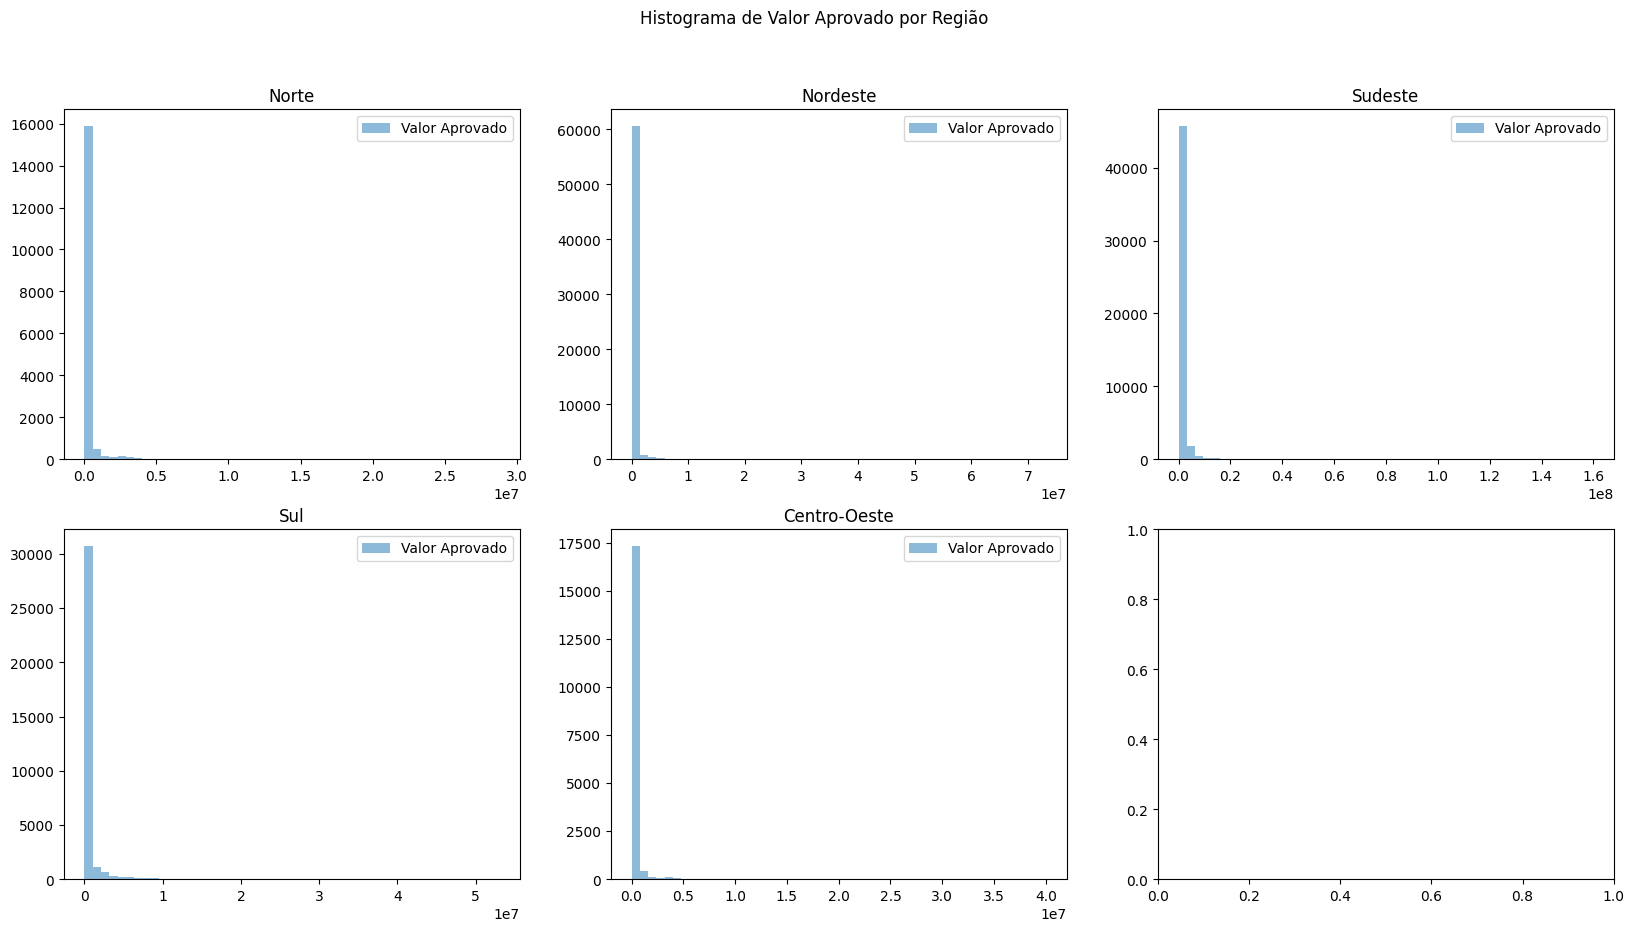

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Histograma de Valor Aprovado por Região')
for i, regiao in enumerate(df['Região'].unique()):
    df_regiao = df[df['Região'] == regiao]
    axs[i//3, i%3].hist(df_regiao['Valor Aprovado'], bins=50, alpha=0.5, label='Valor Aprovado')
    axs[i//3, i%3].set_title(regiao)
    axs[i//3, i%3].legend()

plt.show()

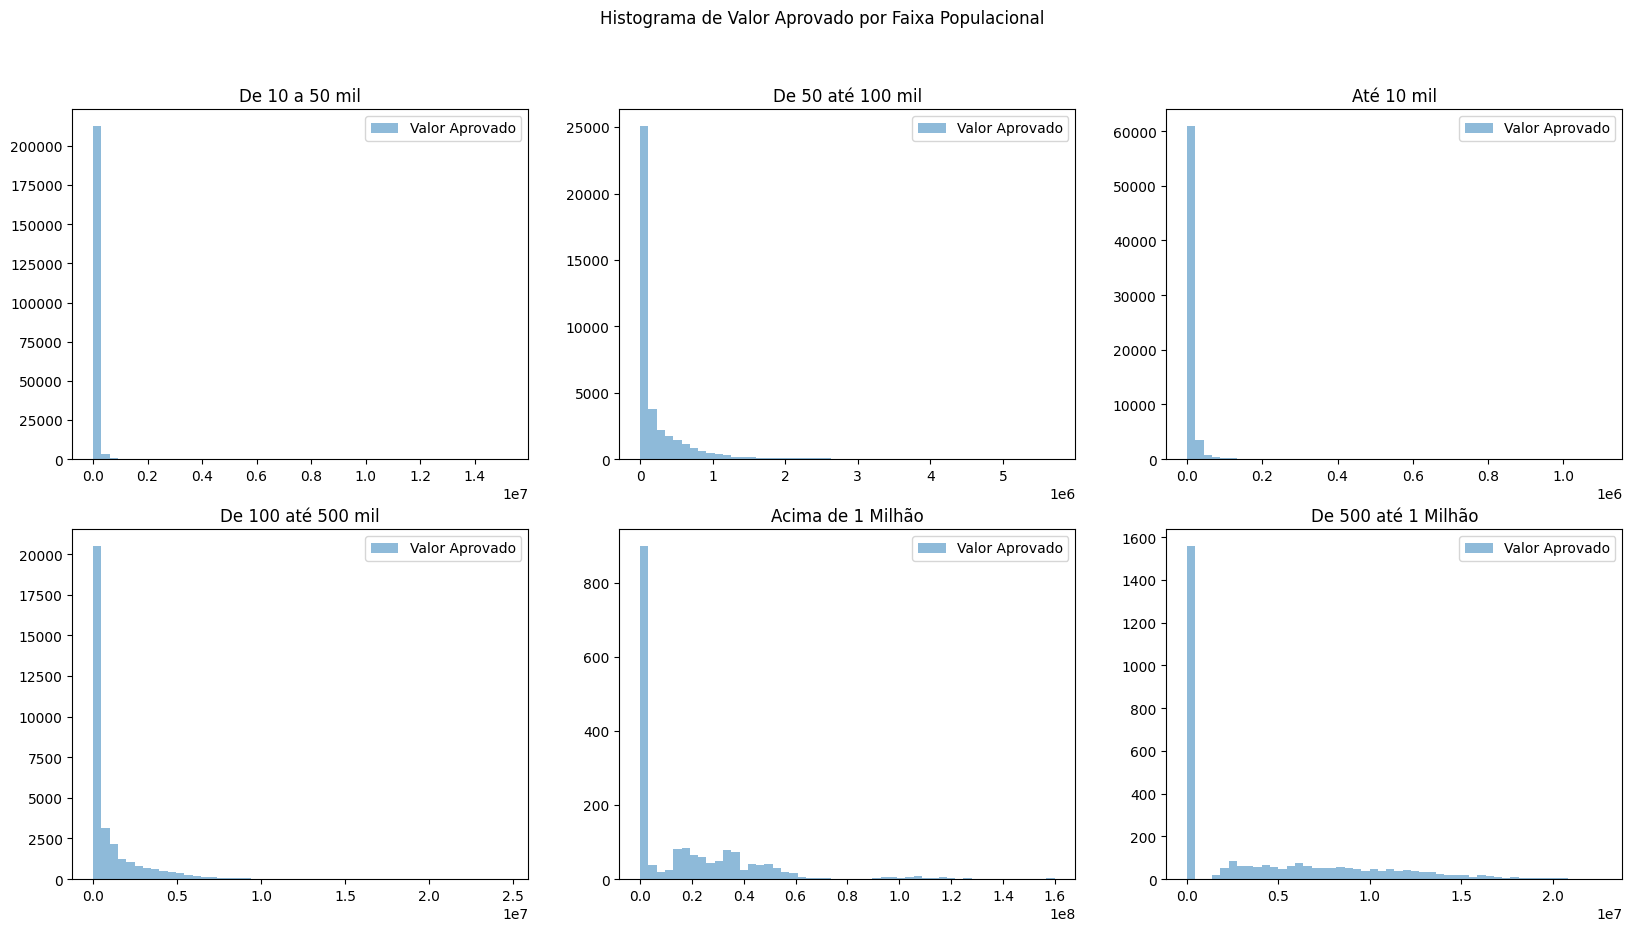

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Histograma de Valor Aprovado por Faixa Populacional')
for i, faixa in enumerate(df['Faixa Populacional'].unique()):
    df_faixa = df[df['Faixa Populacional'] == faixa]
    axs[i//3, i%3].hist(df_faixa['Valor Aprovado'], bins=50, alpha=0.5, label='Valor Aprovado')
    axs[i//3, i%3].set_title(faixa)
    axs[i//3, i%3].legend()

plt.show()